In [262]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import os

In [263]:
file = 'Beverly_Grove_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [264]:
path = os.path.join(location, file)

In [265]:
# import our file

Beverly_Grove_df = pd.read_csv(path, index_col='PARCEL')
Beverly_Grove_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,6727 Drexel Ave,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,942 S Cochran Ave,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
# drop any nulls

Beverly_Grove_df = Beverly_Grove_df.dropna()

In [267]:
# Change the datatype of these two columns into ints

Beverly_Grove_df['TAXAMT'] = Beverly_Grove_df['TAXAMT'].astype(int)
Beverly_Grove_df['EFFYRBLT'] = Beverly_Grove_df['EFFYRBLT'].astype(int)

In [268]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Beverly_Grove_df = Beverly_Grove_df[~Beverly_Grove_df['SITEADDRESS'].str.contains('#')]
Beverly_Grove_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
# Now drop the SiteAddress column
Beverly_Grove_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [270]:
Beverly_Grove_df.columns

Index(['Owned by Trust?', 'Owned by Business?', 'MAIL DIFFERENT FROM SITE?',
       'MAIL OUTSIDE CA?', 'TITLECO1', 'ASSDTOTAL', 'ASSDLAND', 'ASSDSTCT',
       'ASSDOTHR', 'EXEMPTCD', 'EXMPTAMT', 'PCNTIMPD', 'TAXAMT',
       'DOCDATE_YEAR', 'MULTIPARCEL', 'PRICE', 'LENDER1', 'LOANAMOUT1',
       'LOANTYPE1', 'YEARBLT', 'EFFYRBLT', 'LOTSQFT', 'TOTALSF', 'GRGTYPE',
       'BLDGMAT', 'TOTUNITS', 'QUALCLAS', 'BLDGCOND', 'NOSTORY', 'ROOFMAT',
       'FOUNDATN', 'BEDROOMS', 'BATHROOMS', 'FAMILYRM', 'DININGRM', 'POOL',
       'PATIO', 'FIREPLCE', 'AIRMTHOD', 'HEATMTHD', 'VIEW', 'Did it sell?',
       'GRANT DEED', 'IN LIEU OF FORC', 'INTERSPOUSAL', 'JOINT TENANT',
       'NAME CHANGE', 'Other', 'PARTNERSHIP', 'PERSONAL REP', 'QUIT CLAIM',
       'RE-RECORD', 'TAX DEED', 'TRUST TRANSFER', 'TRUSTEES', 'WARRANTY'],
      dtype='object')

In [271]:
len(Beverly_Grove_df)

4705

In [272]:
# Step 1: Create our X and y

y = Beverly_Grove_df['Did it sell?']
X = Beverly_Grove_df.drop(['Did it sell?'], 1)

In [273]:
APN = Beverly_Grove_df.index.values
APN

array([5085010022, 5085033008, 5085032022, ..., 5510018012, 5510017023,
       5514001029])

In [274]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [275]:
X_pca

array([[ 1037442.40088322,   222949.06197812,    99008.44211244],
       [ -932464.7141857 ,   251848.62995471,   -90439.60157539],
       [ -393042.03210882,  -290764.40544306,   -27460.470998  ],
       ...,
       [ -314557.49024403,  -369458.72763661,   -27020.9155848 ],
       [ 2038277.22062523,   419857.55993187, -1288530.60059949],
       [ -962055.78924987,   281605.81570128,   -93574.2647082 ]])

In [276]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [277]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [278]:
X_train_scaled_APN = []

In [279]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 3287, 1: 3287})

In [280]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model_10 = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model_10.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [281]:
# Evaluate the model
y_pred = model_10.predict(X_test_scaled)

In [282]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.621


In [283]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.49355118500495626

In [284]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.7146103073370367

In [285]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.64      0.35      0.76      0.47      0.23      1096
          1       0.07      0.35      0.64      0.11      0.47      0.22        81

avg / total       0.87      0.62      0.37      0.71      0.47      0.23      1177



In [286]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
370,0,0,5088012006
461,0,0,5511021015
996,0,0,5510001024
97,1,0,5512014025
711,0,0,5511041007
38,0,1,5510013010
879,0,0,4332020019
756,0,0,5512009009
13,0,0,5088011013
798,0,0,5511033038


In [287]:
Beverly_Grove_Results_SFRs_df = Beverly_Grove_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Beverly_Grove_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,0,0,1,1157385,925908,231477,0,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1,0,0,57047,40994,16053,0,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,0,0,1,651485,521193,130292,0,1,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,1,0,0,85697,74539,11158,0,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,0,0,0,62487,42013,20474,0,1,...,0,0,0,0,0,0,0,0,0,0


In [288]:
Beverly_Grove_Results_SFRs_df

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5085010022,0,0,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,5085033008,0,0,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,5085032022,0,0,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,5510005006,1,0,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,5089024002,0,0,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,4335003015,0,1,1,0,0,1177690,1177690,0,0,...,0,0,0,0,0,0,0,0,1.0,0.0
4701,4335010018,0,1,1,0,1,1346195,1346195,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4702,5510018012,1,0,0,0,0,762455,509154,253301,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4703,5510017023,0,1,1,1,1,1553301,1087311,465990,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [289]:
Beverly_Grove_Results_SFRs_df.to_csv('Beverly_Grove_Results_SFRs.csv')

# Same as the above but with feature reduction

In [290]:
file = 'Beverly_Grove_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [291]:
path = os.path.join(location, file)

In [292]:
# import our file

Beverly_Grove_df = pd.read_csv(path, index_col='PARCEL')
Beverly_Grove_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,6727 Drexel Ave,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,942 S Cochran Ave,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
# drop any nulls

Beverly_Grove_df = Beverly_Grove_df.dropna()

In [294]:
# Change the datatype of these two columns into ints

Beverly_Grove_df['TAXAMT'] = Beverly_Grove_df['TAXAMT'].astype(int)
Beverly_Grove_df['EFFYRBLT'] = Beverly_Grove_df['EFFYRBLT'].astype(int)

In [295]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Beverly_Grove_df = Beverly_Grove_df[~Beverly_Grove_df['SITEADDRESS'].str.contains('#')]
Beverly_Grove_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
# Now drop the SiteAddress column
Beverly_Grove_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [297]:
Beverly_Grove_df['PARCEL_1'] = Beverly_Grove_df.index.values

In [298]:
# Create our X and y

y = Beverly_Grove_df['Did it sell?']

X = pd.DataFrame(Beverly_Grove_df, columns = ['LOTSQFT',
                                              'TOTALSF',
                                              'PARCEL_1', 
                                              'DOCDATE_YEAR',
                                              'ASSDLAND',
                                              'ASSDSTCT',
                                              'EFFYRBLT',
                                              'TAXAMT',
                                              'ASSDTOTAL',
                                              'YEARBLT',
                                              'PCNTIMPD',
                                              'LOANAMOUT1',
                                              'PRICE',
                                              'BEDROOMS',
                                              'BATHROOMS',
                                              'MAIL DIFFERENT FROM SITE?',
                                              'Owned by Trust?',
                                              'TOTUNITS',
                                              'BLDGCOND',
                                              'NOSTORY',
                                              'TITLECO1',
                                              'QUALCLAS',
                                              'QUIT CLAIM',
                                              'POOL',
                                              'PATIO',
                                              'GRANT DEED',
                                              'AIRMTHOD'])

In [299]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [300]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [301]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [302]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 3287, 1: 3287})

In [303]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [304]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [305]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.597


In [306]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.49221073263044063

In [307]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6963970818638465

## Now for the condos

In [308]:
# bring in our dataframe

Beverly_Grove_df = pd.read_csv(path, index_col='PARCEL')
Beverly_Grove_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,6727 Drexel Ave,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,942 S Cochran Ave,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
# drop any nulls

Beverly_Grove_df = Beverly_Grove_df.dropna()

In [310]:
# Change the datatype of these two columns into ints

Beverly_Grove_df['TAXAMT'] = Beverly_Grove_df['TAXAMT'].astype(int)
Beverly_Grove_df['EFFYRBLT'] = Beverly_Grove_df['EFFYRBLT'].astype(int)

In [311]:
# Make sure our dataframe is only Condos so exclude every property that doesn't have a '#' in its site address

Beverly_Grove_df = Beverly_Grove_df[Beverly_Grove_df['SITEADDRESS'].str.contains('#')]
Beverly_Grove_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5087012023,0,0,1040 S La Jolla Ave #VE,0,0,0,289000,116000,173000,0,...,0,0,0,0,0,0,0,1,0,0
4332020041,0,0,1045 S Bedford St #9,1,0,0,151323,41266,110057,0,...,0,0,0,0,0,0,0,0,0,0
4332020051,0,0,1045 S Bedford St #1,0,0,0,376863,223789,153074,0,...,0,0,0,0,0,0,0,0,0,0


In [312]:
# Now drop the SiteAddress column
Beverly_Grove_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [313]:
# Step 1: Create our X and y

y = Beverly_Grove_df['Did it sell?']
X = Beverly_Grove_df.drop(['Did it sell?'], 1)

In [314]:
APN = Beverly_Grove_df.index.values
APN

array([5087012023, 4332020041, 4332020051, ..., 5089003038, 5089003039,
       5089003040])

In [315]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [316]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [317]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [318]:
X_train_scaled_APN = []

In [319]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 1380, 1: 1380})

In [320]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [321]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [322]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.566


In [323]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.48128019323671495

In [324]:
f1_score(y_test, y_pred, average="weighted")

0.6593455279133104

In [325]:
# See our results in a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[269, 191],
       [ 28,  17]])

In [326]:
# evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71       460
           1       0.08      0.38      0.13        45

    accuracy                           0.57       505
   macro avg       0.49      0.48      0.42       505
weighted avg       0.83      0.57      0.66       505



# Now lets review the discrepencies between sellers and non-sellers

In [327]:
file = 'Beverly_Grove_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [328]:
path = os.path.join(location, file)

In [329]:
# import our file

Beverly_Grove_df = pd.read_csv(path, index_col='PARCEL')
Beverly_Grove_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,6727 Drexel Ave,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,942 S Cochran Ave,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
# drop any nulls

Beverly_Grove_df = Beverly_Grove_df.dropna()

In [331]:
# Change the datatype of these two columns into ints

Beverly_Grove_df['TAXAMT'] = Beverly_Grove_df['TAXAMT'].astype(int)
Beverly_Grove_df['EFFYRBLT'] = Beverly_Grove_df['EFFYRBLT'].astype(int)

In [332]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Beverly_Grove_df = Beverly_Grove_df[~Beverly_Grove_df['SITEADDRESS'].str.contains('#')]
Beverly_Grove_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
# Now drop the SiteAddress column
Beverly_Grove_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [334]:
# Now separate out our sales from non-sales

Beverly_Grove_Sellers_df = Beverly_Grove_df[Beverly_Grove_df['Did it sell?'] == 1]
Beverly_Grove_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5510001001,0,0,1,0,0,537257,388535,148722,0,0,...,0,0,0,0,1,0,0,0,0,0
5085009040,0,0,0,0,0,234138,150130,84008,0,1,...,0,0,0,0,1,0,0,0,0,0
5085007022,0,1,1,0,1,68917,40982,27935,0,0,...,0,0,0,0,0,0,0,0,0,0
5085020010,0,0,0,0,1,684586,547673,136913,0,0,...,0,0,0,0,0,0,0,0,0,0
5070005028,1,0,0,0,1,56695,33940,22755,0,1,...,0,0,0,0,0,0,0,0,0,0


In [335]:
Beverly_Grove_NonSellers_df = Beverly_Grove_df[Beverly_Grove_df['Did it sell?'] == 0]
Beverly_Grove_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,0,0,1,1157385,925908,231477,0,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1,0,0,57047,40994,16053,0,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,0,0,1,651485,521193,130292,0,1,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,1,0,0,85697,74539,11158,0,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,0,0,0,62487,42013,20474,0,1,...,0,0,0,0,0,0,0,0,0,0


In [336]:
# Calculate the the discrepencies
# Mail different from Site

sum(Beverly_Grove_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Beverly_Grove_Sellers_df['MAIL DIFFERENT FROM SITE?']) * 100

26.39751552795031

In [337]:
sum(Beverly_Grove_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Beverly_Grove_NonSellers_df['MAIL DIFFERENT FROM SITE?']) * 100

21.241159023499886

In [338]:
# Mail outside California

sum(Beverly_Grove_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(Beverly_Grove_Sellers_df['MAIL OUTSIDE CA?']) * 100

1.5527950310559007

In [339]:
sum(Beverly_Grove_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(Beverly_Grove_NonSellers_df['MAIL OUTSIDE CA?']) * 100

2.0305726671229753

In [340]:
# Property Size: 'TOTALSF'

Beverly_Grove_Sellers_df['TOTALSF'].mean()

1978.167701863354

In [341]:
Beverly_Grove_NonSellers_df['TOTALSF'].mean()

2120.4375998174764

In [342]:
# Total Assessed Value: 'ASSDTOTAL'

Beverly_Grove_Sellers_df['ASSDTOTAL'].mean()

766325.9751552795

In [343]:
# Total Assessed Value: 'ASSDTOTAL'

Beverly_Grove_NonSellers_df['ASSDTOTAL'].mean()

723766.0412959161

In [344]:
# Avg Year Built

Beverly_Grove_Sellers_df['YEARBLT'].mean()

1926.692546583851

In [346]:
Beverly_Grove_NonSellers_df['YEARBLT'].mean()

1924.0394706821812

In [349]:
# Avg Last Market Sale Price: 'PRICE'

Beverly_Grove_Sellers_df['PRICE'][Beverly_Grove_Sellers_df['PRICE'] != 0].mean()

1202508.1300813009

In [350]:
# Avg Last Market Sale Price: 'PRICE'

Beverly_Grove_NonSellers_df['PRICE'][Beverly_Grove_NonSellers_df['PRICE'] != 0].mean()

1034018.3381123058

In [351]:
# Avg Year of Purchase: 'DOCDATE_YEAR'

Beverly_Grove_Sellers_df['DOCDATE_YEAR'][Beverly_Grove_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2008.1514195583595

In [352]:

Beverly_Grove_NonSellers_df['DOCDATE_YEAR'][Beverly_Grove_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2006.6540968342645

In [353]:
# Avg Tax Amount: 'TAXAMT'

Beverly_Grove_Sellers_df['TAXAMT'][Beverly_Grove_Sellers_df['TAXAMT'] != 0].mean()

9404.2049689441

In [354]:
Beverly_Grove_NonSellers_df['TAXAMT'][Beverly_Grove_NonSellers_df['TAXAMT'] != 0].mean()

8799.434405658225

In [355]:
# Avg Loan Amount: 'LOANAMOUT1'

Beverly_Grove_Sellers_df['LOANAMOUT1'][Beverly_Grove_Sellers_df['LOANAMOUT1'] != 0].mean()

725943.4462809918

In [356]:
Beverly_Grove_NonSellers_df['LOANAMOUT1'][Beverly_Grove_NonSellers_df['LOANAMOUT1'] != 0].mean()

678550.3645598195

# Same as above but for condos

In [357]:
file = 'Beverly_Grove_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [358]:
path = os.path.join(location, file)

In [359]:
# import our file

Beverly_Grove_df = pd.read_csv(path, index_col='PARCEL')
Beverly_Grove_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,6727 Drexel Ave,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,942 S Cochran Ave,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,0,0


In [360]:
# drop any nulls

Beverly_Grove_df = Beverly_Grove_df.dropna()

In [361]:
# Change the datatype of these two columns into ints

Beverly_Grove_df['TAXAMT'] = Beverly_Grove_df['TAXAMT'].astype(int)
Beverly_Grove_df['EFFYRBLT'] = Beverly_Grove_df['EFFYRBLT'].astype(int)

In [362]:
# Make sure our dataframe is only condos

Beverly_Grove_df = Beverly_Grove_df[Beverly_Grove_df['SITEADDRESS'].str.contains('#')]
Beverly_Grove_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5087012023,0,0,1040 S La Jolla Ave #VE,0,0,0,289000,116000,173000,0,...,0,0,0,0,0,0,0,1,0,0
4332020041,0,0,1045 S Bedford St #9,1,0,0,151323,41266,110057,0,...,0,0,0,0,0,0,0,0,0,0
4332020051,0,0,1045 S Bedford St #1,0,0,0,376863,223789,153074,0,...,0,0,0,0,0,0,0,0,0,0


In [363]:
# Now drop the SiteAddress column
Beverly_Grove_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [364]:
# Now separate out our sales from non-sales

Beverly_Grove_Sellers_df = Beverly_Grove_df[Beverly_Grove_df['Did it sell?'] == 1]
Beverly_Grove_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
4333013063,0,0,0,0,1,609150,507625,101525,0,0,...,0,0,0,0,0,0,0,0,0,0
4335003037,0,0,0,0,1,622711,407947,214764,0,0,...,0,0,0,0,0,0,0,0,0,0
4335014054,1,0,0,0,1,599719,440959,158760,0,0,...,0,0,0,0,0,0,0,1,0,0
4335008226,0,0,1,0,0,262032,132949,129083,0,1,...,0,0,0,0,1,0,0,0,0,0
4335008228,0,0,0,0,1,243335,117300,126035,0,0,...,0,0,0,0,0,0,0,0,0,0


In [365]:
Beverly_Grove_NonSellers_df = Beverly_Grove_df[Beverly_Grove_df['Did it sell?'] == 0]
Beverly_Grove_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5087012023,0,0,0,0,0,289000,116000,173000,0,0,...,0,0,0,0,0,0,0,1,0,0
4332020041,0,0,1,0,0,151323,41266,110057,0,0,...,0,0,0,0,0,0,0,0,0,0
4332020051,0,0,0,0,0,376863,223789,153074,0,0,...,0,0,0,0,0,0,0,0,0,0
4332020042,0,0,1,0,1,255813,148748,107065,0,1,...,0,0,0,0,0,0,0,0,0,0
4332020043,1,0,1,0,1,176090,38515,137575,0,0,...,0,0,0,0,1,0,0,0,0,0


In [366]:
# Mail different from Site

sum(Beverly_Grove_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Beverly_Grove_Sellers_df['MAIL DIFFERENT FROM SITE?']) * 100

39.44444444444444

In [367]:
sum(Beverly_Grove_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(Beverly_Grove_NonSellers_df['MAIL DIFFERENT FROM SITE?']) * 100

40.16304347826087

In [368]:
# Mail outside California

sum(Beverly_Grove_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(Beverly_Grove_Sellers_df['MAIL OUTSIDE CA?']) * 100

2.2222222222222223

In [369]:
sum(Beverly_Grove_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(Beverly_Grove_NonSellers_df['MAIL OUTSIDE CA?']) * 100

4.456521739130435

In [370]:
# Property Size: 'TOTALSF'

Beverly_Grove_Sellers_df['TOTALSF'].mean()

1298.8222222222223

In [371]:
Beverly_Grove_NonSellers_df['TOTALSF'].mean()

1296.7728260869565

In [372]:
# Total Assessed Value: 'ASSDTOTAL'

Beverly_Grove_Sellers_df['ASSDTOTAL'].mean()

543271.5944444444

In [373]:
# Total Assessed Value: 'ASSDTOTAL'

Beverly_Grove_NonSellers_df['ASSDTOTAL'].mean()

499659.37282608694

In [374]:
# Avg Year Built

Beverly_Grove_Sellers_df['YEARBLT'].mean()

1977.3833333333334

In [375]:
Beverly_Grove_NonSellers_df['YEARBLT'].mean()

1981.4233695652174

In [376]:
# Avg Last Market Sale Price: 'PRICE'

Beverly_Grove_Sellers_df['PRICE'][Beverly_Grove_Sellers_df['PRICE'] != 0].mean()

612878.3578947368

In [377]:
# Avg Last Market Sale Price: 'PRICE'

Beverly_Grove_NonSellers_df['PRICE'][Beverly_Grove_NonSellers_df['PRICE'] != 0].mean()

549881.5698711596

In [378]:
# Avg Year of Purchase: 'DOCDATE_YEAR'

Beverly_Grove_Sellers_df['DOCDATE_YEAR'][Beverly_Grove_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2010.4261363636363

In [379]:
Beverly_Grove_NonSellers_df['DOCDATE_YEAR'][Beverly_Grove_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2008.316921335597

In [380]:
# Avg Tax Amount: 'TAXAMT'

Beverly_Grove_Sellers_df['TAXAMT'][Beverly_Grove_Sellers_df['TAXAMT'] != 0].mean()

6546.072222222222

In [381]:
Beverly_Grove_NonSellers_df['TAXAMT'][Beverly_Grove_NonSellers_df['TAXAMT'] != 0].mean()

6024.436956521739

In [382]:
# Avg Loan Amount: 'LOANAMOUT1'

Beverly_Grove_Sellers_df['LOANAMOUT1'][Beverly_Grove_Sellers_df['LOANAMOUT1'] != 0].mean()

431543.6629213483

In [383]:
Beverly_Grove_NonSellers_df['LOANAMOUT1'][Beverly_Grove_NonSellers_df['LOANAMOUT1'] != 0].mean()

377537.08591065294

# Lets make some charts

In [384]:
file = 'Beverly_Grove_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [385]:
path = os.path.join(location, file)

In [386]:
# import our file

Beverly_Grove_df = pd.read_csv(path, index_col='PARCEL')
Beverly_Grove_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,6727 Drexel Ave,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,942 S Cochran Ave,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,0,0


In [387]:
# drop any nulls

Beverly_Grove_df = Beverly_Grove_df.dropna()

In [388]:
# Change the datatype of these two columns into ints

Beverly_Grove_df['TAXAMT'] = Beverly_Grove_df['TAXAMT'].astype(int)
Beverly_Grove_df['EFFYRBLT'] = Beverly_Grove_df['EFFYRBLT'].astype(int)

In [389]:
# Make sure our dataframe is only SFRs

Beverly_Grove_df = Beverly_Grove_df[~Beverly_Grove_df['SITEADDRESS'].str.contains('#')]
Beverly_Grove_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0


In [392]:
# Convert all of our tricky columns that have too many 0's

Beverly_Grove_df['TAXAMT'] = Beverly_Grove_df['TAXAMT'][Beverly_Grove_df['TAXAMT'] != 0]
Beverly_Grove_df['ASSDTOTAL'] = Beverly_Grove_df['ASSDTOTAL'][Beverly_Grove_df['ASSDTOTAL'] != 0]
Beverly_Grove_df['LOANAMOUT1'] = Beverly_Grove_df['LOANAMOUT1'][Beverly_Grove_df['LOANAMOUT1'] != 0]
Beverly_Grove_df['PRICE'] = Beverly_Grove_df['PRICE'][Beverly_Grove_df['PRICE'] != 0]
Beverly_Grove_df['DOCDATE_YEAR'] = Beverly_Grove_df['DOCDATE_YEAR'][Beverly_Grove_df['DOCDATE_YEAR'] != 0]

In [393]:
# Split into sellers and non-sellers
Beverly_Grove_Sellers_df = Beverly_Grove_df[Beverly_Grove_df['Did it sell?'] == 1]
Beverly_Grove_Sellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5510001001,0,0,6215 Drexel Ave,1,0,0,537257,388535,148722,0,...,0,0,0,0,1,0,0,0,0,0
5085009040,0,0,1057 S Dunsmuir Ave,0,0,0,234138,150130,84008,0,...,0,0,0,0,1,0,0,0,0,0
5085007022,0,1,1021 S Ridgeley Dr,1,0,1,68917,40982,27935,0,...,0,0,0,0,0,0,0,0,0,0
5085020010,0,0,1200 S Sierra Bonita Ave,0,0,1,684586,547673,136913,0,...,0,0,0,0,0,0,0,0,0,0
5070005028,1,0,1299 S Sycamore Ave,0,0,1,56695,33940,22755,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
Beverly_Grove_NonSellers_df = Beverly_Grove_df[Beverly_Grove_df['Did it sell?'] == 0]
Beverly_Grove_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,NAME CHANGE,Other,PARTNERSHIP,PERSONAL REP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5085010022,0,0,1030 S Dunsmuir Ave,0,0,1,1157385,925908,231477,0,...,0,0,0,0,0,0,0,0,0,0
5085033008,0,0,1364 S Ridgeley Dr,1,0,0,57047,40994,16053,0,...,0,0,0,0,0,0,0,0,0,0
5085032022,0,0,1322 Hauser Blvd,0,0,1,651485,521193,130292,0,...,0,0,0,0,0,0,0,0,0,0
5510005006,1,0,6727 Drexel Ave,1,0,0,85697,74539,11158,0,...,0,0,0,0,0,0,0,0,0,0
5089024002,0,0,942 S Cochran Ave,0,0,0,62487,42013,20474,0,...,0,0,0,0,0,0,0,0,0,0


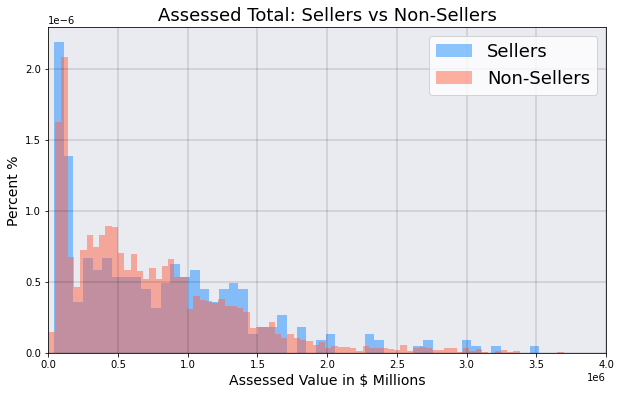

In [417]:
import matplotlib.pyplot as plt
# 1: Assessed Total

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Beverly_Grove_Sellers_df['ASSDTOTAL'], bins=50, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Beverly_Grove_NonSellers_df['ASSDTOTAL'], bins=100, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Assessed Total: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Assessed Value in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)
#ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16])

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,4000000)
plt.savefig('Beverly_Grove_AssessedTotal_DensityDistribution_SFR.png')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


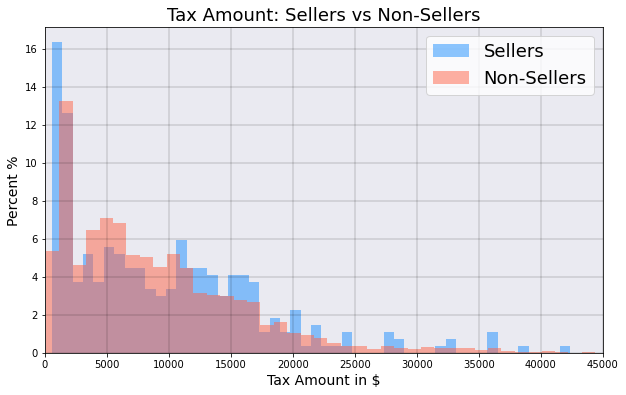

In [424]:
# 1: Tax Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Beverly_Grove_Sellers_df['TAXAMT'], bins=50, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Beverly_Grove_NonSellers_df['TAXAMT'], bins=50, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Tax Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Tax Amount in $', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)
ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16])

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,45000)
plt.savefig('Beverly_Grove_TaxAmount_DensityDistribution_SFR.png')

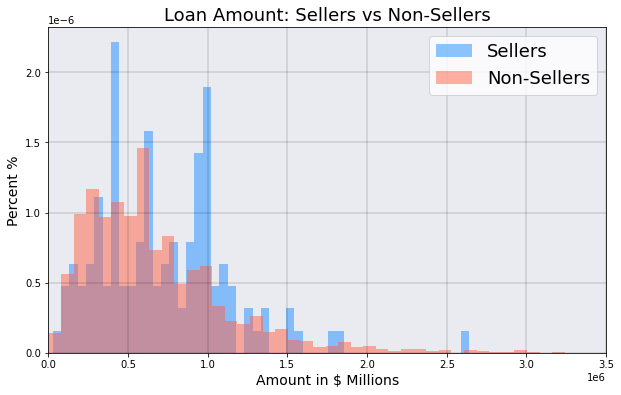

In [433]:
# 3: Loan Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Beverly_Grove_Sellers_df['LOANAMOUT1'], bins=50, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Beverly_Grove_NonSellers_df['LOANAMOUT1'], bins=100, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Loan Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Amount in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)
#ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16])

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,3500000)
plt.savefig('Beverly_Grove_LoanAmount_DensityDistribution_SFR.png')

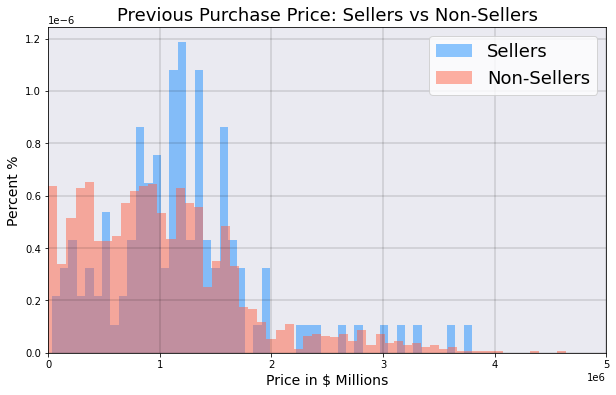

In [441]:
# 4: Price

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Beverly_Grove_Sellers_df['PRICE'], bins=50, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Beverly_Grove_NonSellers_df['PRICE'], bins=100, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Previous Purchase Price: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Price in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)
#ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16])

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,5000000)
plt.savefig('Beverly_Grove_PreviousPurchasePrice_DensityDistribution_SFR.png')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


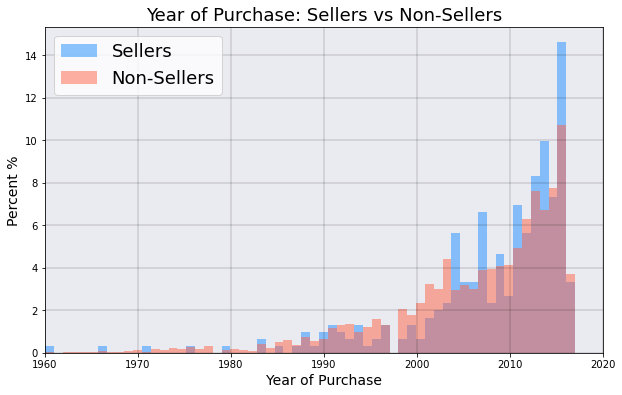

In [442]:
# 5: Year of Past Purchase

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Beverly_Grove_Sellers_df['DOCDATE_YEAR'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(Beverly_Grove_NonSellers_df['DOCDATE_YEAR'], bins=60, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Year of Purchase: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Year of Purchase', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)
ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14])

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(1960, 2020)
plt.savefig('Beverly_Grove_YearOfPurchase_DensityDistribution_SFR.png')